In [6]:
import sys
sys.path.append("/home/gant/Documents/tpcanalysis/python_comp/src")
from openCSV import openCSV
from processLine import processLine
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import RANSACRegressor
from skimage.measure import LineModelND, ransac

In [7]:
data_csv = openCSV("../converteddata/data2_1.csv")
data_csv.readCSV()

entry_nr = 21

singular_entry = data_csv.m_data[data_csv.m_data["entry_nr"]==entry_nr]


if singular_entry.empty:
    print("The value ", entry_nr, " was not found in the 'entry_nr' column.")
else:
    print("The value ", entry_nr, " was found in the 'entry_nr' column.")

The value  21  was found in the 'entry_nr' column.


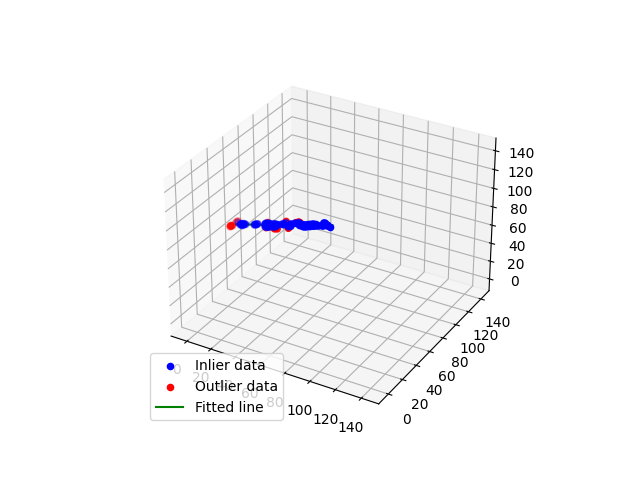

In [9]:
#Use RANSAC in 3D to fit a line to the data set.
%matplotlib widget
line_proc = processLine(singular_entry)


fig = plt.figure()
line_proc.drawLine(fig)

plt.show()

